<h1 align ="center">

🧪 **Optuna Results Analysis - Intermediate Tests with GLM and GAM**  

</h1>

### 📚 **Importing functions from Optuna**

In [48]:
import optuna
from optuna.visualization.matplotlib import plot_contour
from optuna.visualization.matplotlib import plot_optimization_history
from optuna.visualization.matplotlib import plot_param_importances
from optuna.visualization.matplotlib import plot_timeline

### **GLM**

In [6]:
study_name = "optimization_clusters_glm_teste1751900564.8571913"
storage_url = "sqlite:///optimization_clusters_glm_teste3.db"

study_glm = optuna.load_study(study_name=study_name, storage=storage_url)

##### **Best trial**

In [18]:
study_glm.best_value

13.83635207303915

In [17]:
study_glm.best_params

{'clusterer': 'kmeans',
 'n_clusters': 10,
 'distribution': 'gaussian',
 'link_gaussian': 'identity'}

##### **Optimization history**

This plot shows the study optimization history, by showing the objective value for each Optuna trial.

C:\Users\julia24002\AppData\Local\Temp\ipykernel_30396\3119116630.py:1: ExperimentalWarning:

plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.



<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

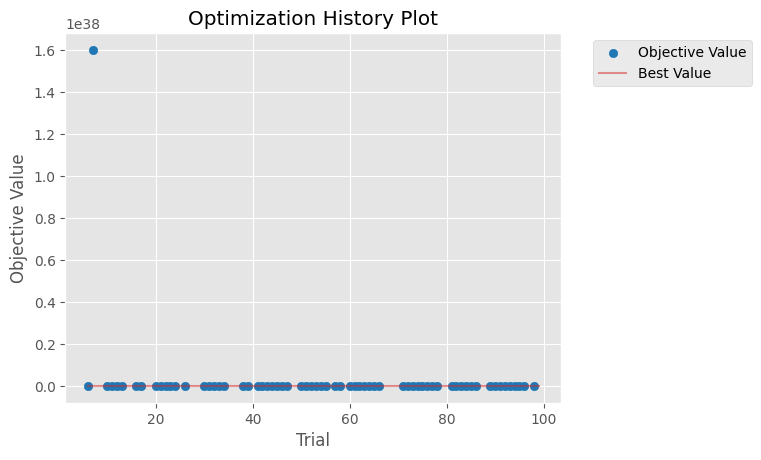

In [7]:
plot_optimization_history(study_glm)

We can't see anything with this! The graph is probably distorted by the outlier. To avoid this, we can manually filter the test results to avoid None (Optuna prune) and outliers.

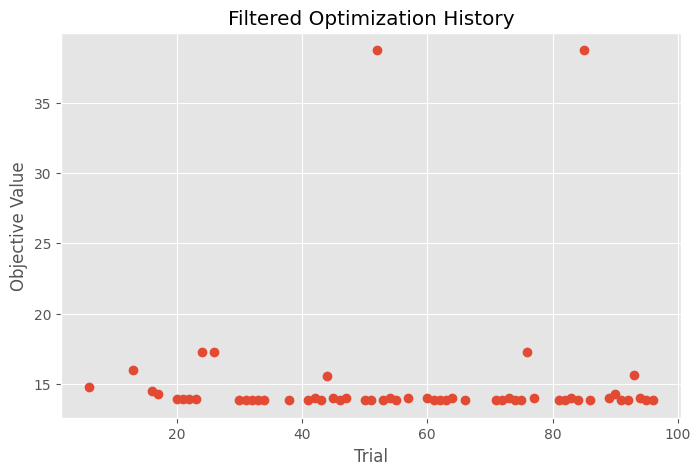

In [ ]:
import matplotlib.pyplot as plt
trials = [t for t in study_glm.trials if t.value is not None and t.value < 100]

plt.figure(figsize=(8, 5))
plt.plot([t.number for t in trials], [t.value for t in trials], "o")
plt.title("Filtered Optimization History")
plt.xlabel("Trial")
plt.ylabel("Objective Value")
plt.grid(True)
plt.show()

Now we can clearly see that most attempts are still close to 15, which makes sense considering that the best attempt reached a value of 13.83.

##### **Contour plot**

Plot the parameter relationship between two features. In our case, number of clusters (n_clusters) and type of clusterer used (clusterer).

C:\Users\julia24002\AppData\Local\Temp\ipykernel_30396\78474467.py:1: ExperimentalWarning:

plot_contour is experimental (supported from v2.2.0). The interface can change in the future.



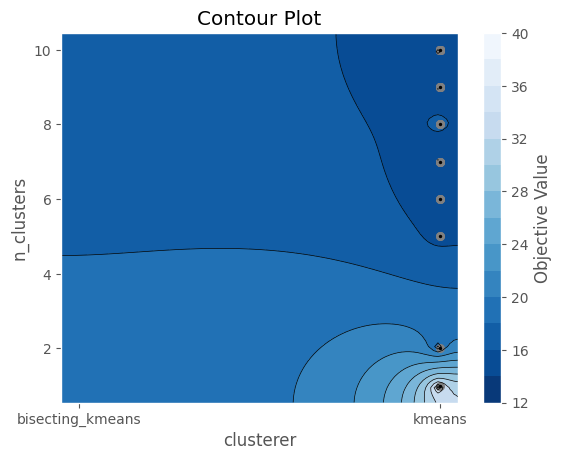

In [26]:
plot_contour(study_glm, params=["n_clusters", "clusterer"]);

From this graph it is possible to see that the tests were dominated by the K-means clusterer and a greater number of clusters, in general, presented better results.

##### **Hyperparameter Importances**

Plot hyperparameter importances based on the Optuna attempts.

C:\Users\julia24002\AppData\Local\Temp\ipykernel_30396\2876478485.py:1: ExperimentalWarning:

plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.



<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

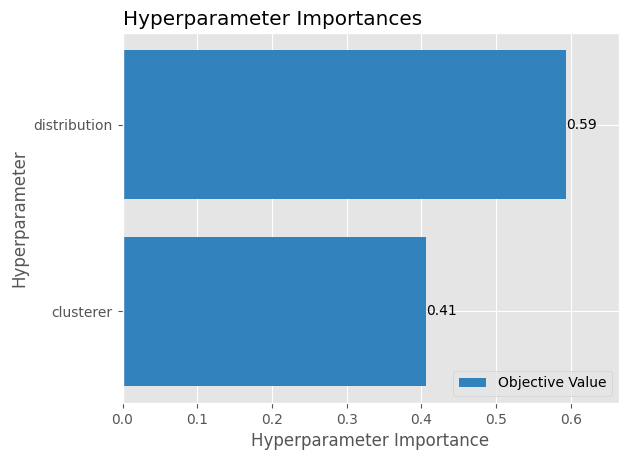

In [ ]:
plot_param_importances(study_glm)

Distribution seems like the most important feature for Optuna Optimization.

##### **Timeline plot**

Plot the timeline of a study, indicating complete and pruned trials.

C:\Users\julia24002\AppData\Local\Temp\ipykernel_30396\3937888951.py:1: ExperimentalWarning:

plot_timeline is experimental (supported from v3.2.0). The interface can change in the future.



<Axes: title={'center': 'Timeline Plot'}, xlabel='Datetime', ylabel='Trial'>

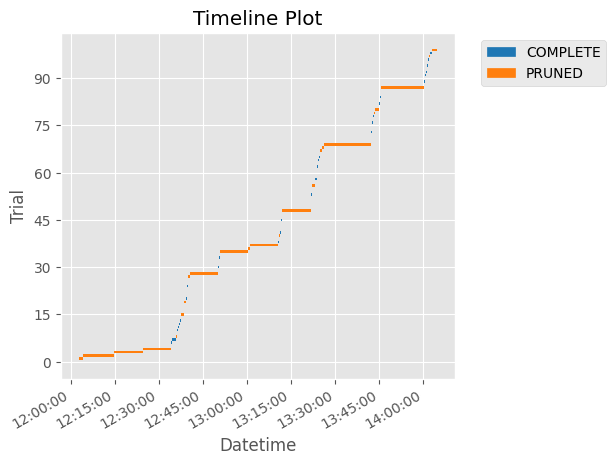

In [32]:
plot_timeline(study_glm)


Many prunned trials!

### **GAM**

In [35]:
study_name = "optimization_clusters_gam_teste08_07_2025_10_22_58"
storage_url = "sqlite:///optimization_clusters_gam_teste08_07_2025_10_22_58.db"

study_gam = optuna.load_study(study_name=study_name, storage=storage_url)

##### **Best trial**

In [37]:
study_gam.best_value

12.014706738113588

In [40]:
study_gam.best_params

{'clusterer': 'bisecting_kmeans',
 'n_clusters_bkmeans': 13,
 'bisecting_strategy': 'largest_cluster',
 'distribution': 'normal',
 'link_gaussian': 'identity',
 'lam': 3.0146186479252566,
 'n_splines': 16}

##### **Optimization history**

C:\Users\julia24002\AppData\Local\Temp\ipykernel_30396\2504318445.py:1: ExperimentalWarning:

plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.



<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

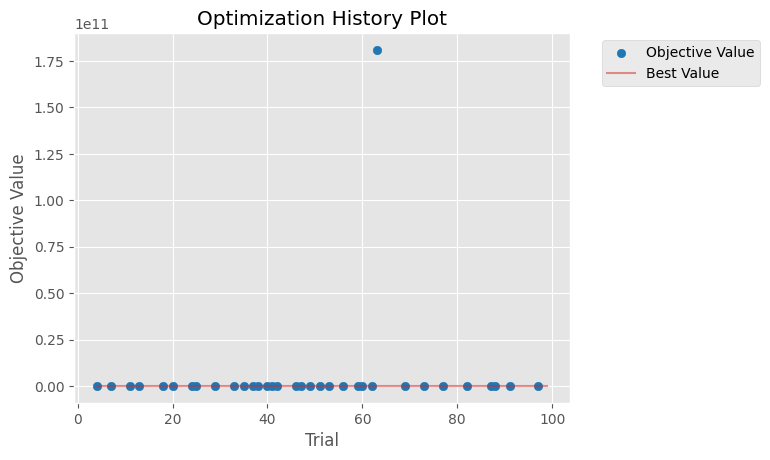

In [41]:
plot_optimization_history(study_gam)

We can´t see anything with this (again)! So let´s see without the outliers.

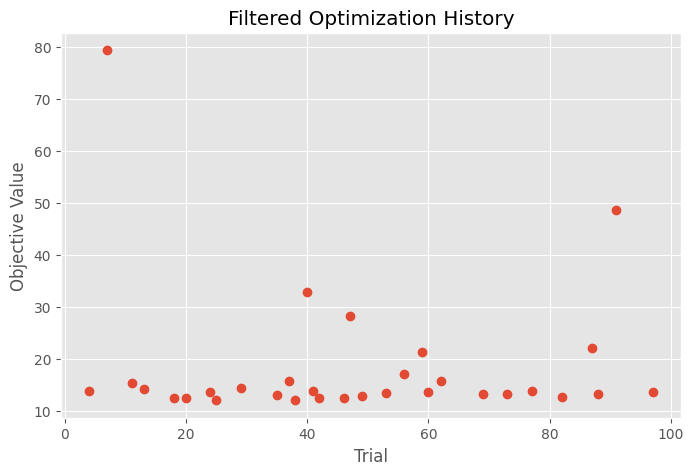

In [43]:
import matplotlib.pyplot as plt
trials = [t for t in study_gam.trials if t.value is not None and t.value < 100]

# Plot manual
plt.figure(figsize=(8, 5))
plt.plot([t.number for t in trials], [t.value for t in trials], "o")
plt.title("Filtered Optimization History")
plt.xlabel("Trial")
plt.ylabel("Objective Value")
plt.grid(True)
plt.show()

The behavior is very similar to GLM. But two differences can be noticed: the values ​​are smaller and there are fewer attempts.

##### **Contour plot**

C:\Users\julia24002\AppData\Local\Temp\ipykernel_30396\3488926030.py:1: ExperimentalWarning:

plot_contour is experimental (supported from v2.2.0). The interface can change in the future.



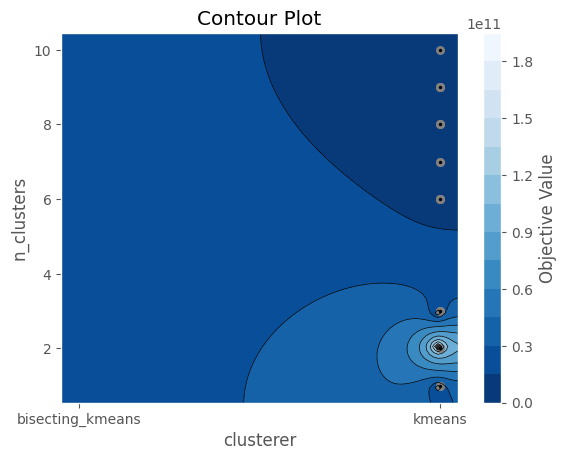

In [45]:
plot_contour(study_gam, params=["n_clusters", "clusterer"]);

##### **Hyperparameter Importances**

C:\Users\julia24002\AppData\Local\Temp\ipykernel_30396\510894356.py:1: ExperimentalWarning:

plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.



<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

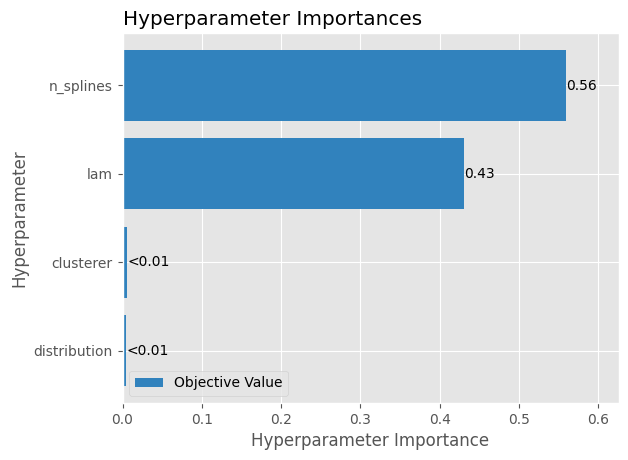

In [46]:
plot_param_importances(study_gam)

In the case of GAM, the most important hyperparameter was the number of splines per feature.

##### **Timeline plot**

C:\Users\julia24002\AppData\Local\Temp\ipykernel_30396\3476554823.py:1: ExperimentalWarning:

plot_timeline is experimental (supported from v3.2.0). The interface can change in the future.



<Axes: title={'center': 'Timeline Plot'}, xlabel='Datetime', ylabel='Trial'>

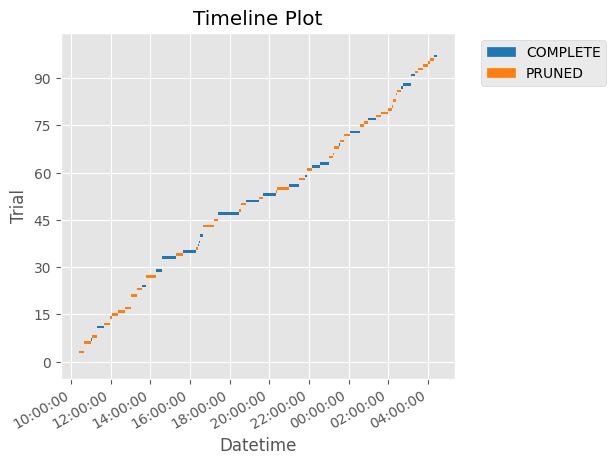

In [47]:
plot_timeline(study_gam)

The time was longer compared with GLM, but it appears there were fewer pruned trials.

### 🗃️ **References!**

[1] Quick Visualization for Hyperparameter Optimization Analysis — Optuna 4.4.0 documentation. Available: <https://optuna.readthedocs.io/en/stable/tutorial/10_key_features/005_visualization.html>. Acess in: 9 jul. 2025.

